## Import Libraries

In [1]:
!pip install opencv-python
!pip install tensorflow 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## Load & Preprocess Dataset

In [2]:

data_path =data_path = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'


# Initialize image and label lists
images = []
labels = []

# Define class names and numeric labels
label_map = {
    "adenocarcinoma": 0,
    "normal": 1,
    "squamous_cell_carcinoma": 2
}

# Add debug print to check if the directory exists
if not os.path.exists(data_path):
    print(f"Error: Directory {data_path} does not exist")
else:
    print(f"Found directory: {data_path}")
    print(f"Contents: {os.listdir(data_path)}")

# Process each class folder
for label_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, label_name)
    
    # Check if it's a directory
    if not os.path.isdir(class_folder):
        print(f"Skipping {label_name} as it's not a directory")
        continue
        
    # Check if this label is in our mapping
    if label_name not in label_map:
        print(f"Skipping unknown class folder: {label_name}")
        continue
        
    print(f"Processing class: {label_name}")
    
    # Count images in this class
    img_count = 0
    
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label_map[label_name])
            img_count += 1
        else:
            print(f"Failed to load image: {img_path}")
    
    print(f"Loaded {img_count} images for class {label_name}")

# Check if we have any images
if len(images) == 0:
    print("Error: No images were loaded. Please check your dataset path and structure.")
else:
    # Convert to numpy arrays
    images = np.array(images) / 255.0  # Normalize
    labels = to_categorical(labels, num_classes=3)  # One-hot encode

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    print(f"Total images: {len(images)}")
    print(f"Training images: {len(X_train)}")
    print(f"Test images: {len(X_test)}")


Found directory: D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets
Contents: ['adenocarcinoma', 'normal', 'squamous_cell_carcinoma']
Processing class: adenocarcinoma
Loaded 5000 images for class adenocarcinoma
Processing class: normal
Loaded 5000 images for class normal
Processing class: squamous_cell_carcinoma
Loaded 5000 images for class squamous_cell_carcinoma
Total images: 15000
Training images: 12000
Test images: 3000


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

# Define the CNN model
model = Sequential([
    tf.keras.Input(shape=(128, 128, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(16384, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    
  

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16384)       │      18,890,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 16384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 589824)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      75,497,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,481,987 (360.42 MB)

 Trainable params: 94,481,987 (360.42 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 818s 2s/step - accuracy: 0.7817 - loss: 0.4978 - val_accuracy: 0.8710 - val_loss: 0.2963
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 798s 2s/step - accuracy: 0.8914 - loss: 0.2909 - val_accuracy: 0.9130 - val_loss: 0.2220
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.9124 - loss: 0.2328 - val_accuracy: 0.8590 - val_loss: 0.3647
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 895s 2s/step - accuracy: 0.9169 - loss: 0.2204 - val_accuracy: 0.9233 - val_loss: 0.2101
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1547s 4s/step - accuracy: 0.9266 - loss: 0.2010 - val_accuracy: 0.9100 - val_loss: 0.1927
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 894s 2s/step - accuracy: 0.9241 - loss: 0.1942 - val_accuracy: 0.9253 - val_loss: 0.1919
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.9338 - loss: 0.1723 - val_accuracy: 0.9437 - val_loss: 0.1354
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 789s 2s/step - accuracy: 0.9390 - loss: 0.1522 - val_acc

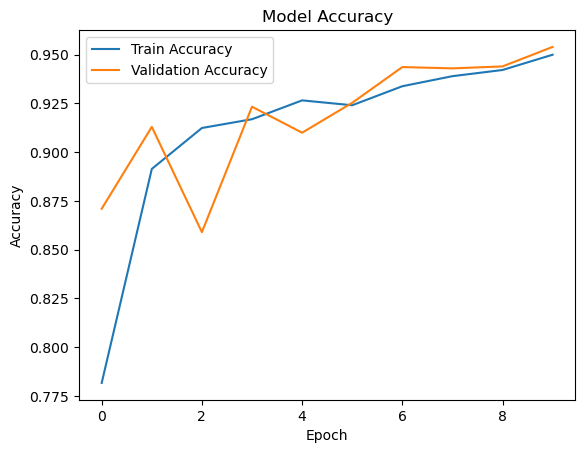

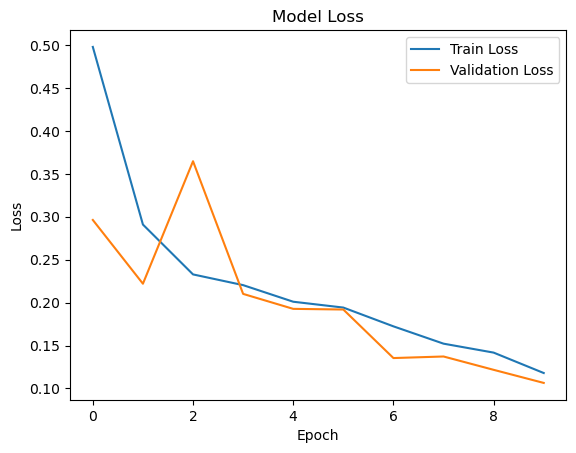

In [5]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 462ms/step - accuracy: 0.9540 - loss: 0.1064
Test Accuracy: 95.40%
Test Loss: 0.1064


In [7]:
model.save("lung_cancer_cnn_model.keras")

NameError: name 'ImageDataGenerator' is not defined